# Study 1: Model Evaluation Reliability

In [34]:
import pandas as pd
import sys, os
from matplotlib import pyplot as plt
import seaborn as sns

## Load the evaluation data

In [35]:
data = pd.read_csv('../out/study1.csv')
data

,metric,estimator,mean,bias,variance,n,i,dataset
0,CCC,In-Sample,0.438187,0.435512,NaN,50,0,simple
1,MAE,In-Sample,0.668302,-0.245643,NaN,50,0,simple
2,R2,In-Sample,0.273418,0.585714,NaN,50,0,simple
3,RMSE,In-Sample,0.840239,-0.304868,NaN,50,0,simple
4,RMSPE,In-Sample,15.359039,0.488115,NaN,50,0,simple
...,...,...,...,...,...,...,...,...
11995,RMSE,LOOCV,0.672396,0.023813,0.167247,500,49,spectral
11996,RMSPE,LOOCV,43.244673,20.644023,1840.437715,500,49,spectral
11997,RSR,LOOCV,0.942575,-0.023220,NaN,500,49,spectral
11998,r,LOOCV,0.335290,0.042809,NaN,500,49,spectral


## Figure 1: Model Evaluation Reliability (Bias)

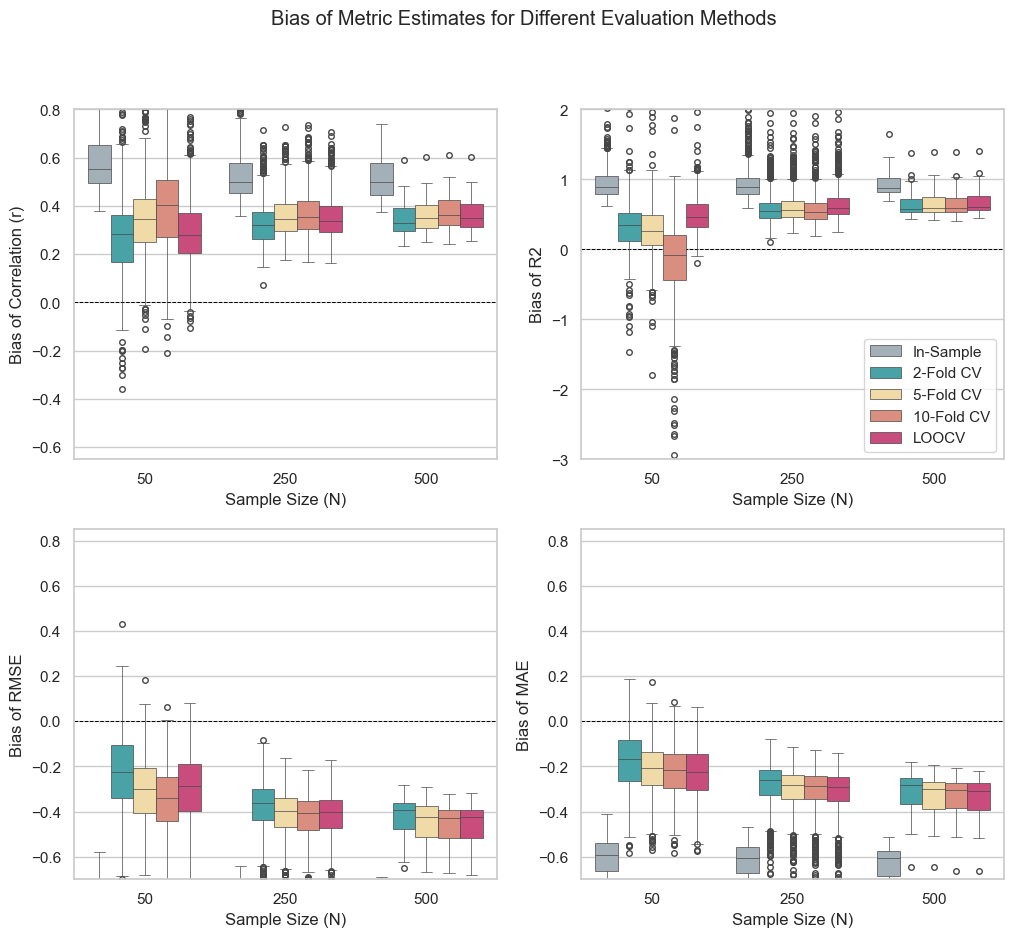

In [57]:
sns.set_theme(style="whitegrid")
palette = ["#A0B1BA", "#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, m in enumerate(["r", "RMSE", "R2", "MAE"]):
    j = i % 2
    k = i // 2
    ax = axes[j][k]
    ax.axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    sns.boxplot(
        x="n",
        y="bias",
        hue="estimator",
        data=data.query("dataset == 'spectral' and metric == '%s'" % m),
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=ax,
    )
    ax.set_xlabel("Sample Size (N)")
    ax.set_ylabel(m)

# r
# axes[0][0].set_title("Correlation (r)")
axes[0][0].set_ylim(-0.65, 0.8)
axes[0][0].set_ylabel("Bias of Correlation (r)")
# R2
# axes[0][1].set_title("Coefficient of Determination (R2)")
axes[0][1].set_ylim(-2.5, 1.3)
# axes[0][1].set_yscale("symlog", base=2)
axes[0][1].set_yticks([-3, -2, -1, 0, 1, 2])
axes[0][1].set_ylabel("Bias of R2")

# RMSE
# axes[1][0].set_title("Root Mean Squared Error (RMSE)")
axes[1][0].set_ylim(-0.7, 0.85)
axes[1][0].set_ylabel("Bias of RMSE")

# MAE
# axes[1][1].set_title("Mean Absolute Error (MAE)")
axes[1][1].set_ylim(-0.7, 0.85)
axes[1][1].set_ylabel("Bias of MAE")

# legend
axes[0][0].get_legend().remove()
axes[0][1].legend(loc="lower right", ncol=1)
axes[1][0].get_legend().remove()
axes[1][1].get_legend().remove()

# show
fig.suptitle("Bias of Metric Estimates for Different Evaluation Methods")
fig.savefig("../out/study1a.png", dpi=300)

## Figure 2: Model Evaluation Reliability (Variance)

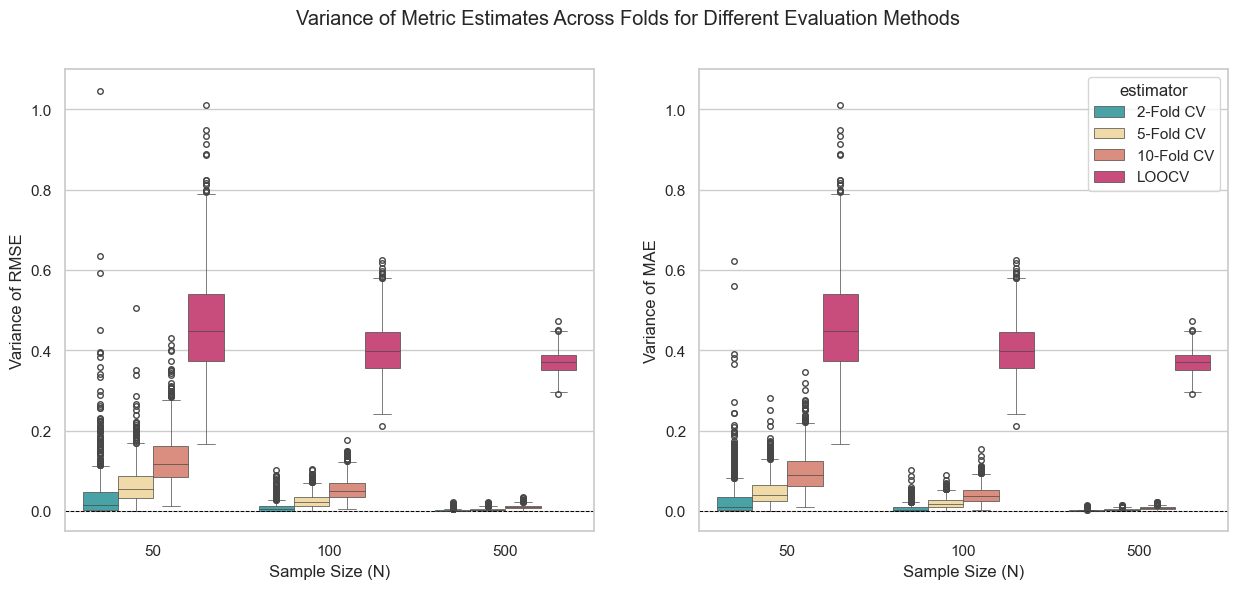

In [63]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, m in enumerate(["RMSE", "MAE"]):
    sns.boxplot(
        data=data.query(f"metric == '{m}' and estimator != 'In-Sample'"),
        x="n", y="variance",
        hue="estimator",
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    axes[i].axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    axes[i].set_ylim(-0.05, 1.1)
    axes[i].set_xlabel("Sample Size (N)")

# RMSE
axes[0].get_legend().remove()
axes[0].set_ylabel("Variance of RMSE")

# MAE
axes[1].set_ylabel("Variance of MAE")

fig.suptitle("Variance of Metric Estimates Across Folds for Different Evaluation Methods")
fig.savefig("out/study1b.png", dpi=300)

In [45]:
data.query("dataset=='spectral'")

,metric,estimator,mean,bias,variance,n,i,dataset
40,CCC,In-Sample,0.646328,0.646328,NaN,50,0,spectral
41,CCC,2-Fold CV,0.456310,0.456310,0.037599,50,0,spectral
42,CCC,5-Fold CV,0.610217,0.610217,0.007095,50,0,spectral
43,CCC,10-Fold CV,0.584547,0.584547,0.179077,50,0,spectral
44,CCC,LOOCV,0.557589,0.557589,NaN,50,0,spectral
...,...,...,...,...,...,...,...,...
95915,r2,In-Sample,0.469615,0.458255,NaN,500,198,spectral
95916,r2,2-Fold CV,0.433094,0.421734,0.000673,500,198,spectral
95917,r2,5-Fold CV,0.461098,0.449738,0.005395,500,198,spectral
95918,r2,10-Fold CV,0.465954,0.454594,0.012600,500,198,spectral


In [79]:
data = pd.read_csv('../out/study1.csv')
data

,metric,estimator,mean,bias,variance,n,i,dataset
0,CCC,In-Sample,0.675533,0.682049,NaN,50,0,simple
1,MAE,In-Sample,0.394941,-0.431997,NaN,50,0,simple
2,R2,In-Sample,0.583908,0.688168,NaN,50,0,simple
3,RMSE,In-Sample,0.614932,-0.417027,NaN,50,0,simple
4,RMSPE,In-Sample,0.895289,-7.755298,NaN,50,0,simple
...,...,...,...,...,...,...,...,...
111195,RMSE,LOOCV,1.778155,-0.057225,1.164804,500,389,spectral
111196,RMSPE,LOOCV,21.017442,-9.221858,430.284012,500,389,spectral
111197,RSR,LOOCV,0.939053,-0.052154,NaN,500,389,spectral
111198,r,LOOCV,0.346774,0.043206,NaN,500,389,spectral


/opt/homebrew/Caskroom/miniconda/base/envs/pyniche/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


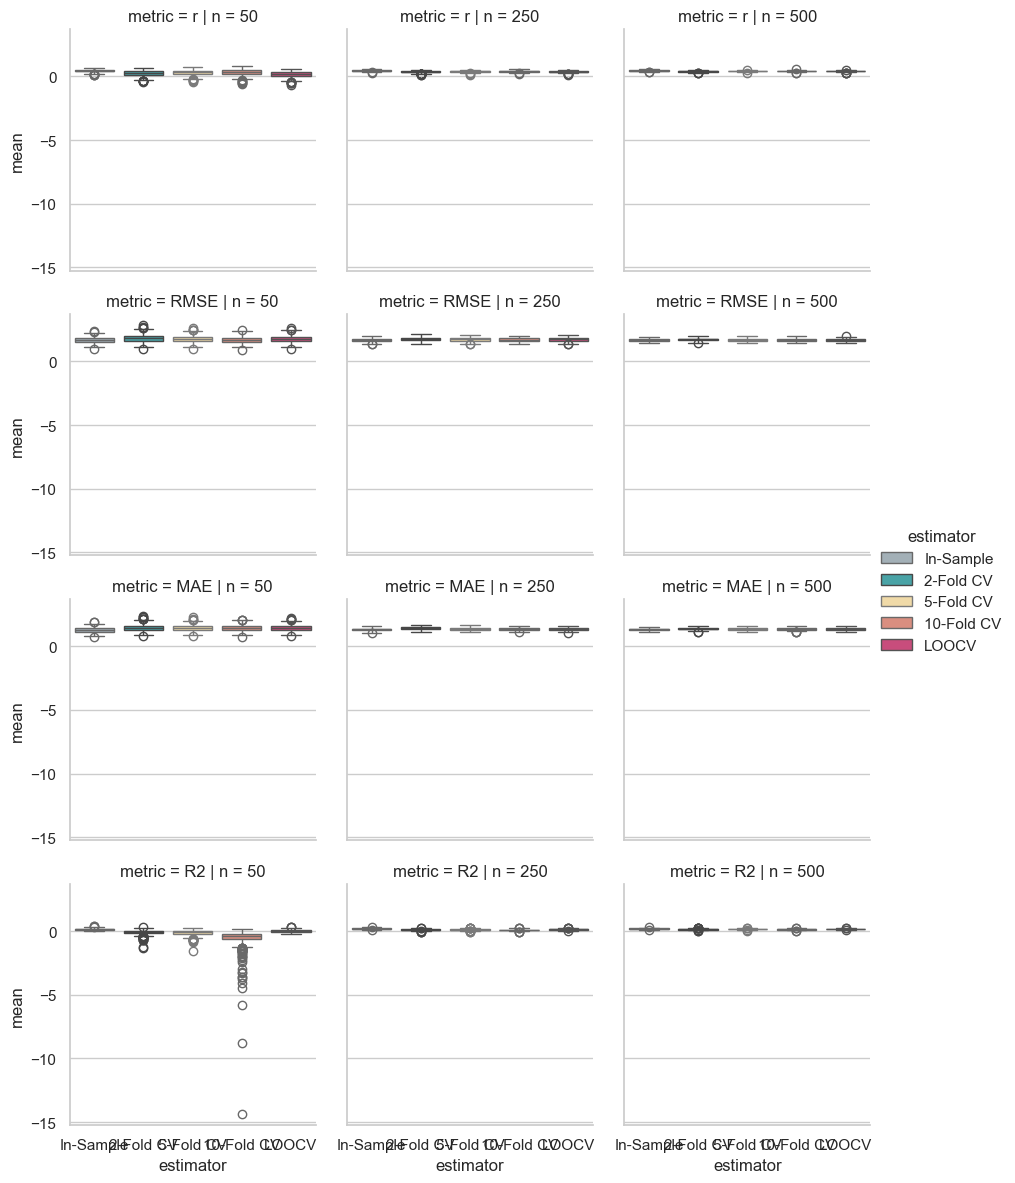

In [85]:
sns.set_theme(style="whitegrid")
palette = ["#A0B1BA", "#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]
sns.FacetGrid(data.query("dataset=='spectral'"),
                col="n", 
                #col_order=["r", "RMSE", "R2", "RSR"],
                row="metric", row_order=["r", 
                                         "RMSE", 
                                         "MAE", 
                                         "R2",
                                        #  "RSR"
                                         ],
                hue="estimator",
                sharey=True,
                palette=palette).map(sns.boxplot, "estimator", "mean").add_legend()

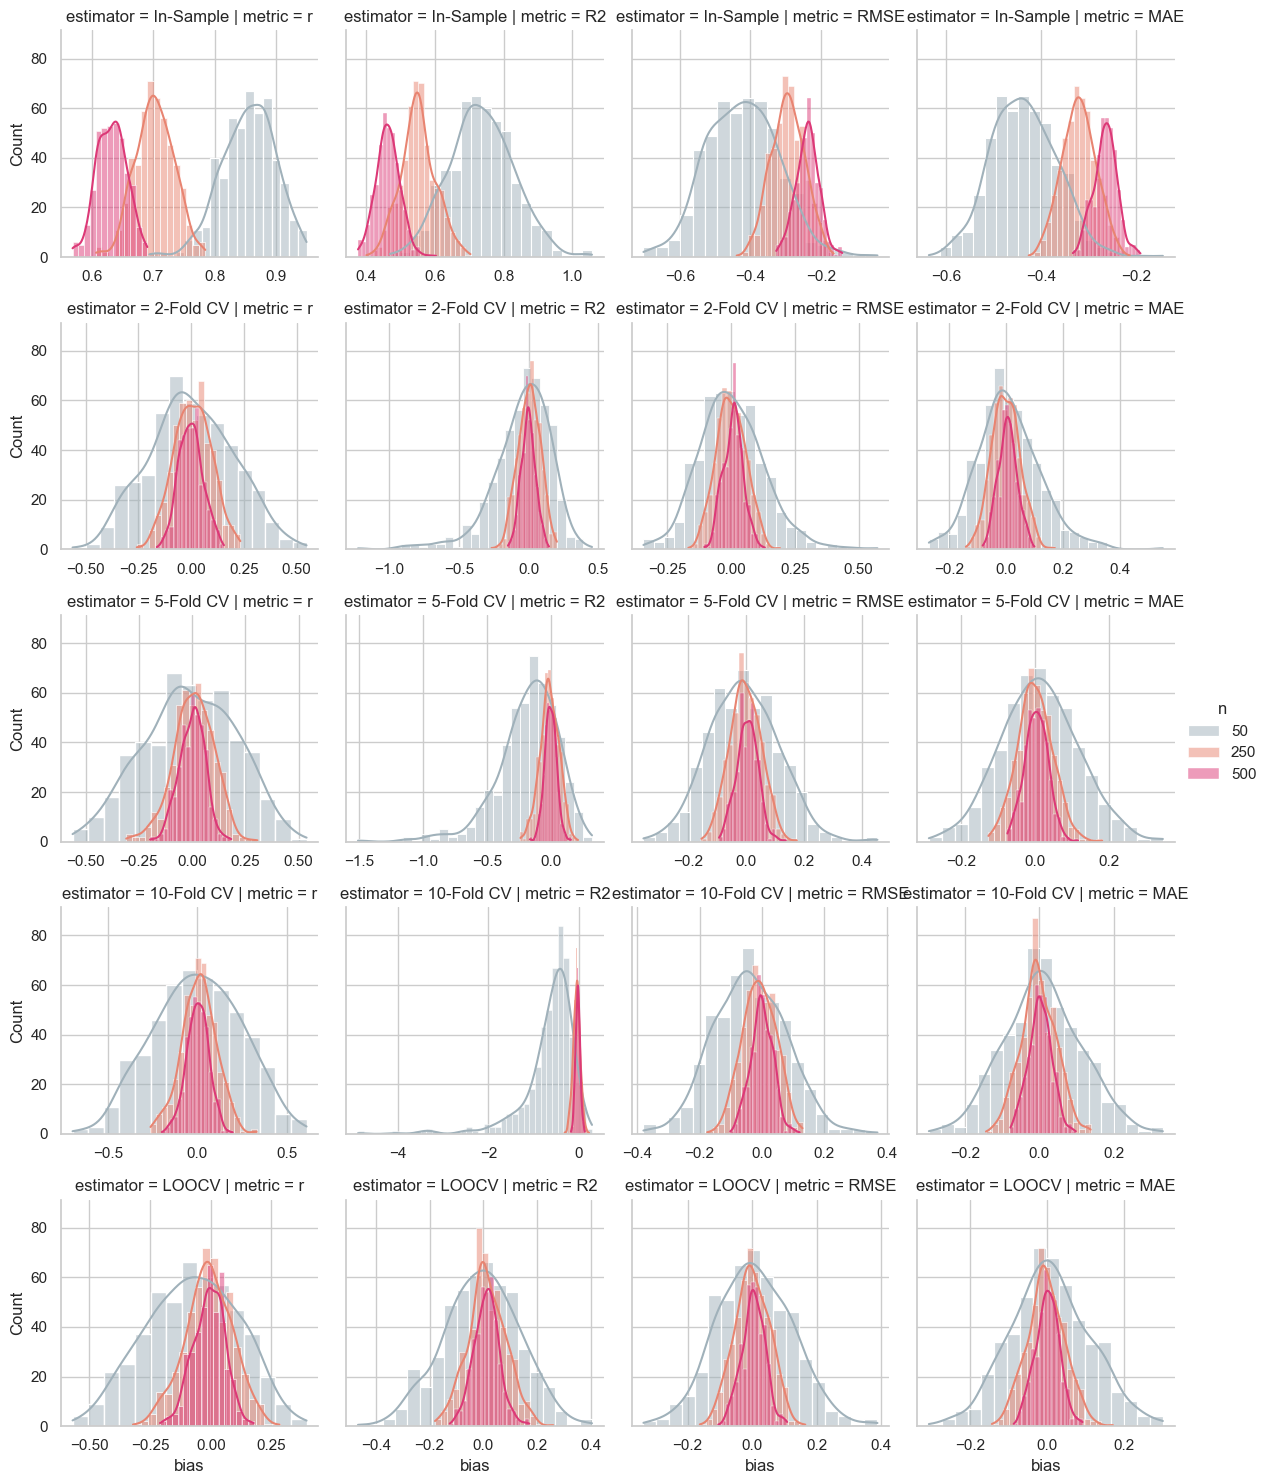

In [82]:
sns.set_theme(style="whitegrid")
palette = ["#A0B1BA",  "#E88471", "#DC3977"]
sns.FacetGrid(data.query("dataset=='simple'"),
                col="metric", 
                col_order=["r", "R2", "RMSE", "MAE"],
                row="estimator", 
                hue="n",
                sharex=False,
                palette=palette
                ).map(sns.histplot, "bias", kde=True,).add_legend()

In [83]:
# RMSE vs MAE
data

,metric,estimator,mean,bias,variance,n,i,dataset
0,CCC,In-Sample,0.675533,0.682049,NaN,50,0,simple
1,MAE,In-Sample,0.394941,-0.431997,NaN,50,0,simple
2,R2,In-Sample,0.583908,0.688168,NaN,50,0,simple
3,RMSE,In-Sample,0.614932,-0.417027,NaN,50,0,simple
4,RMSPE,In-Sample,0.895289,-7.755298,NaN,50,0,simple
...,...,...,...,...,...,...,...,...
111195,RMSE,LOOCV,1.778155,-0.057225,1.164804,500,389,spectral
111196,RMSPE,LOOCV,21.017442,-9.221858,430.284012,500,389,spectral
111197,RSR,LOOCV,0.939053,-0.052154,NaN,500,389,spectral
111198,r,LOOCV,0.346774,0.043206,NaN,500,389,spectral


In [42]:
data.query("metric == 'r'").groupby(["dataset", "metric", "estimator", "n"]).aggregate(["mean", "std"])

mean                bias            \
                                    mean       std      mean       std   
dataset  metric estimator  n                                             
simple   r      10-Fold CV 50   0.081201  0.248987  0.080751  0.250740   
                           250 -0.005372  0.090394 -0.004191  0.089423   
                           500 -0.008203  0.055852 -0.008853  0.055549   
                2-Fold CV  50   0.018365  0.212945  0.017916  0.213202   
                           250  0.022812  0.075181  0.023994  0.075222   
                           500 -0.000305  0.055889 -0.000955  0.055255   
                5-Fold CV  50   0.058626  0.245226  0.058176  0.248146   
                           250 -0.008269  0.088802 -0.007087  0.087140   
                           500  0.000578  0.060250 -0.000072  0.060573   
                In-Sample  50   0.858424  0.041887  0.857974  0.044872   
                           250  0.706962  0.028094  0.708143  0.028418   
                           500  0.634167  0.029373  0.633517  0.030616   
                LOOCV      50  -0.020323  0.210246 -0.020773  0.212642   
                           250 -0.021973  0.086384 -0.020791  0.085730   
                           500 -0.013340  0.062241 -0.013991  0.062177   
spectral r      10-Fold CV 50   0.306785  0.217970  0.055480  0.213983   
                           250  0.372437  0.071955  0.002176  0.067247   
                           500  0.400837  0.054309  0.000544  0.052247   
                2-Fold CV  50   0.234586  0.225424 -0.016719  0.235526   
                           250  0.344158  0.086772 -0.026103  0.081020   
                           500  0.378091  0.067225 -0.022202  0.065144   
                5-Fold CV  50   0.267001  0.214029  0.015696  0.213856   
                           250  0.363805  0.073160 -0.006456  0.069328   
                           500  0.396561  0.050222 -0.003732  0.049574   
                In-Sample  50   0.459844  0.102635  0.208539  0.111145   
                           250  0.432991  0.058826  0.062730  0.052929   
                           500  0.437369  0.045411  0.037076  0.042457   
                LOOCV      50   0.171749  0.226030 -0.079557  0.227901   
                           250  0.353988  0.074061 -0.016273  0.068196   
                           500  0.394700  0.049355 -0.005593  0.046263   

                                variance               i             
                                    mean       std  mean        std  
dataset  metric estimator  n                                         
simple   r      10-Fold CV 50   0.387418  0.124628  24.5  14.577380  
                           250  0.040469  0.015564  24.5  14.577380  
                           500  0.017345  0.008706  10.0   6.204837  
                2-Fold CV  50   0.009017  0.015558  24.5  14.577380  
                           250  0.001970  0.003217  24.5  14.577380  
                           500  0.000925  0.000707  10.0   6.204837  
                5-Fold CV  50   0.120694  0.081201  24.5  14.577380  
                           250  0.018948  0.010507  24.5  14.577380  
                           500  0.005592  0.002609  10.0   6.204837  
                In-Sample  50        NaN       NaN  24.5  14.577380  
                           250       NaN       NaN  24.5  14.577380  
                           500       NaN       NaN  10.0   6.204837  
                LOOCV      50        NaN       NaN  24.5  14.577380  
                           250       NaN       NaN  24.5  14.577380  
                           500       NaN       NaN  10.0   6.204837  
spectral r      10-Fold CV 50   0.347711  0.138340  24.5  14.577380  
                           250  0.038359  0.018304  24.5  14.577380  
                           500  0.018144  0.007970  10.0   6.204837  
                2-Fold CV  50   0.015516  0.028344  24.5  14.577380  
                           250  0.003674  0.005502  2